
# ICS - Travaux Pratiques 11

15.05.25


<font color=grey>_Ce 11e TP se concentre sur la méthode de Newton ainsi que sur les méthodes de point fixe._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from collections.abc import Callable

## Exercice 1 : Newton

Dans cet exercice, il vous est proposé de déterminer numériquement les zéros de la fonction 
$f(x)=(x+1)^2\left(x-\frac{3}{2}\right)$. 

Pour ce faire, implémentez la **méthode de Newton** présentée en cours en définissant une fonction `resoudre_par_Newton`$\dots$
* $\dots$ dont les arguments sont la fonction `f` étudiée, le point de départ `x_0` de la méthode, la fonction dérivée `fprime`, la tolérance `eps` et le nombre maximum d'itérations autorisées `k_max` ;
* $\dots$ qui calcule par itérations une approximation d'un zéro de $f$ ;
* $\dots$ qui s'arrête :
    - soit quand la valeur absolue de $f(x_k)$ est inférieure à la tolérance ; 
    - soit quand le nombre maximum d'itérations est atteint ; 
    - si la valeur de la dérivée utilisée à chaque itération est inférieure à `1e-10` pour éviter tout problème de divergence dans la formule utilisée ;
* $\dots$ qui retourne une valeur approchée d'un zéro de $f$, ainsi qu'une liste de tuples, ces tuples contenant les couples $(x_k,f(x_k))$ utilisés à chaque itération $k$. 

Testez votre implémentation en recherchant les deux zéros de la fonction $f$ avec une tolérance de $10^{-8}$. Expérimentez l'efficacité de la méthode selon le point de départ $x_0$ choisi et selon la nature du zéro considéré. Constatez-vous des différences notables ? Si oui, essayez d'en expliquer la raison, notamment en vous basant sur le graphe de cette fonction.

Représentez graphiquement la différence
$$
x_{k} - x_{k-1}
$$
en fonction des itérations. Quelles conclusions peut-on tirer de la comparaison de cette différence à la dernière itération avec la tolérance (sur $f(x_k)$) que nous avons considérée ?

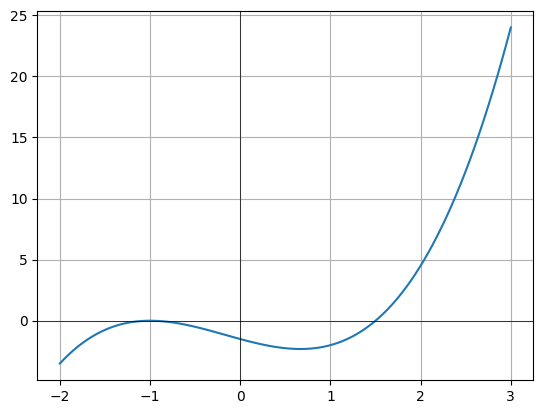

In [18]:
# Commencez par représenter graphiquement la fonction !
f = lambda x: (x+1)**2 * (x - 3/2)
dif = lambda f, x: (f(x + 1e-5) - f(x - 1e-5)) / (2 * 1e-5)
x = np.linspace(-2, 3, 100)
y = f(x)
plt.plot(x, y)
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

In [35]:
# Implémentation de la méthode de Newton
def newton(f: Callable, x0: float, fprime: Callable=dif, eps: float=1e-5, kmax: int=100) -> (float, list[tuple]):
    """
    Méthode de Newton
    :param f: fonction dont on cherche la racine
    :param df: dérivée de la fonction
    :param x0: point de départ
    :param eps: précision
    :param kmax: nombre maximum d'itérations
    :return: racine trouvée
    """
    steps = []
    for k in range(kmax):
        if fprime is None:
            fprime = np.gradient(f)
        if fprime(f, x0) == 0:
            raise ValueError("La dérivée est nulle, la méthode de Newton ne peut pas être appliquée.")
        steps.append((x0, f(x0)))
        x1 = x0 - f(x0) / fprime(f, x0)
        if abs(x1 - x0) < eps:
            return x1, steps
        x0 = x1
    raise ValueError("La méthode de Newton n'a pas convergé après {} itérations.".format(kmax))

In [36]:
# recherche du premier zéro de la fonction f
print(newton(f, 0))

(-0.9999931629559531, [(0, -1.5), (-0.7500000000367201, -0.1406249999609849), (-0.8823529412055103, -0.032973743114593786), (-0.9426656738895619, -0.00802959154903264), (-0.9716732705695599, -0.0019832795308858116), (-0.9859182630026894, -0.0004929459496537268), (-0.9929791300113464, -0.00012288546144983452), (-0.9964945151297494, -3.067798355386298e-05), (-0.9982484890073892, -7.664103623857182e-06), (-0.9991245516155236, -1.9153537324198922e-06), (-0.9995623524990365, -4.787545127883134e-07), (-0.9997811954180871, -1.196781372984817e-07), (-0.999890602507219, -2.991821931838515e-08), (-0.9999453024604703, -7.479388431267164e-09), (-0.9999726515394276, -1.8698252842387766e-09), (-0.9999863258545092, -4.67453080436709e-10)])


In [37]:
# recherche du second zéro de la fonction f
print(newton(f, 2))

(1.5, [(2, 4.5), (1.62500000000662, 0.8613281250499606), (1.510869565220794, 0.06852680408180042), (1.5000933009892887, 0.0005831747092397338), (1.5000000069632822, 4.352051382424381e-08)])


In [ ]:
# Représentation de la convergence et de la différence x_k - x_{k-1}
def newton_plot(f: Callable, x0: float, fprime: Callable=dif, eps: float=1e-5, kmax: int=100) -> pd.DataFrame:
    """
    Méthode de Newton avec traçage
    :param f: fonction dont on cherche la racine
    :param df: dérivée de la fonction
    :param x0: point de départ
    :param eps: précision
    :param kmax: nombre maximum d'itérations
    :return: DataFrame avec les itérations et les valeurs de x
    """
    data = []
    for k in range(kmax):
        if fprime is None:
            fprime = np.gradient(f)
        if fprime(f, x0) == 0:
            raise ValueError("La dérivée est nulle, la méthode de Newton ne peut pas être appliquée.")
        x1 = x0 - f(x0) / fprime(f, x0)
        data.append((k, x1))
        if abs(x1 - x0) < eps:
            break
        x0 = x1
    


***

## Exercice 2 : k-contraction

Les fonctions de $\mathbb{R}$ dans $\mathbb{R}$, $\displaystyle f(x)=\frac{\cos{(x)}+x}{4}$ et $\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}$ sont-elles **$K$-contractantes** sur tout intervalle $I$ contenu dans $\mathbb{R}$?

En cas de réponse négative, essayez de trouver un intervalle autour de l'origine dans lequel la fonction est $K$-contractante.

In [ ]:
# Représentation graphique des fonctions
f = lambda x: (np.cos(x) + x)/4
g = lambda x: (np.cos(x) + x**2)/4

X = np.linspace(-100, 100, 1000)


***

## Exercice 3 : Points fixes

Dans cet exercice, il vous est demandé d'étudier les quatre fonctions suivantes :
$$
f(x) = 1-\sin{(x)}\,,~~~~
g(x) = \exp{(-4x)}\,,~~~~
h(x) = 0.4 \exp{(x)}-0.25\,~~~~\hbox{et}~~~~
i(x) = \displaystyle\frac{1}{1+\left(\frac{1-x}{x}\right)^2}\,,
$$
sur l'intervalle ouvert $I=\,]0,1[$.

Pour chacune de ces fonctions, vous devez en particulier $\dots$
- $\dots$ vérifier graphiquement l'existence d'un **unique point fixe** sur $I$ (en représentant la **fonction "identité"** $y(x)=x$) ;
- $\dots$ choisir deux valeurs différentes pour le point de départ $x_0$ et d'effectuer un certain nombre d'**itérations de la méthode de Picard** (en les représentant graphiquement sur la même figure) ;
- $\dots$ déterminer la nature du point fixe (**répulsif** ou **attracteur**) ;
- $\dots$ expliquer vos observations en vous intéressant au **comportement de la dérivée** et à sa valeur aux alentours du point fixe.

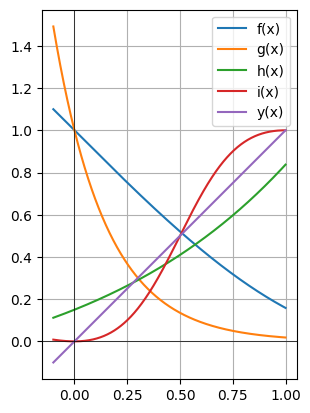

In [43]:
# Représentation graphique de l'existence d'un point fixe
f = lambda x: 1 - np.sin(x)
g = lambda x: np.exp(-4*x)
h = lambda x: 0.4 * np.exp(x) - 0.25
i = lambda x: 1/(1 + ((1-x)/x)**2)
y = lambda x: x

X = np.linspace(-0.1, 1, 1000)
plt.plot(X, f(X), label='f(x)')
plt.plot(X, g(X), label='g(x)')
plt.plot(X, h(X), label='h(x)')
plt.plot(X, i(X), label='i(x)')
plt.plot(X, y(X), label='y(x)')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axis('scaled')
plt.grid()
plt.legend()
plt.show()


On remarque que $f, g, h$ sont des bonnes fonctions auxiliaires, mais pas $i$.

In [ ]:
# Représentation graphique (ou sur papier) de la méthode de Picard
# appliquée aux fonctions présentées.


***

## Exercice 4 : Fonction d'itération

Soit $f(x)$ une fonction dont on cherche les zéros. Laquelle des fonctions $\Phi(x)$ suivantes est-elle, a priori, acceptable comme fonction d’itération ? Justifiez votre réponse.  <br/><br/>
&nbsp;   a) $\Phi(x) = f(x)/x$   <br/><br/>
&nbsp;   b) $\Phi(x) = (x + 1)f(x)$  <br/><br/>
&nbsp;   c) $\Phi(x) = 5f(x) + x^2 + x$   <br/><br/>
&nbsp;   d) $\Phi(x) = (x + 1) [f (x) + 1]$   <br/><br/>
&nbsp;   e) $\Phi(x) = (x + 1)f(x) + x$  

***

## Exercice 5 : Méthode de Picard

Reprenons les fonctions de l'exercice 2

$$
\displaystyle f(x)=\frac{\cos{(x)}+x}{4}~~~\hbox{et}~~~
\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}.
$$

Nous avons montré (n'est-ce pas) qu'elles sont $K$-contractantes sur $\mathbb{R}$ dans le cas de $f(x)$ et sur, par exemple, 
$I_\pi=\displaystyle\left]-\frac{\pi}{2},\frac{\pi}{2}\right[$ dans le cas de $g(x)$.

Dans cet exercice, il vous est demandé de :

a) vérifier que la fonction $f$ admet un unique point fixe et que la suite $\{x_k\}$ obtenue par la méthode de Picard converge vers ce point fixe quel que soit le point de départ $x_0$ de la méthode :
   * représentez graphiquement la fonction $f$ ;
   * vérifiez "visuellement" l'existence d'un unique point fixe ;
   * trouvez une valeur approchée à 5 décimales de ce point fixe grâce à la méthode de Picard, en testant votre implémentation avec différentes valeurs de départ $x_0$.

b) vérifier de manière analogue le théorème du point fixe du cours dans le cas particulier de la fonction $g$ sur $I_\pi$. Ce théorème s'applique-t-il dans le cas de cette fonction sur l'intervalle $\displaystyle\left]-\frac{\pi}{2},0\right[$ ?

In [ ]:
# a)


In [14]:
# b)
